# Synthetic Gaussian beams

This notebook shows how to generate the $a_{\ell m}$ coefficients of a Gaussian beam, either circular or elliptical.

In [1]:
from pathlib import Path

lbs_path = str(Path().absolute().parent)

import sys

if lbs_path not in sys.path:
    sys.path.append(lbs_path)

In [2]:
import litebird_sim as lbs
import healpy
import matplotlib.pylab as plt
import numpy as np

In [3]:
PLOT_TITLE = {
    0: "I",
    1: "Q",
    2: "U",
}


def plot_function(
    fwhm_min_deg=1.0,
    fwhm_max_deg=2.0,
    psi_ell_deg=0.0,
    psi_pol_deg=0.0,
    cross_polar_leakage=1e-5,
    lmax=250,
    nside=512,
):
    # This function returns a 3×N array containing the I/Q/U a_ℓm
    # coefficients of the beam.
    alm = lbs.gauss_beam_to_alm(
        lmax=lmax,
        mmax=lmax,
        fwhm_min_rad=np.deg2rad(fwhm_min_deg),
        fwhm_max_rad=np.deg2rad(fwhm_max_deg),
        psi_ell_rad=np.deg2rad(psi_ell_deg),
        psi_pol_rad=np.deg2rad(psi_pol_deg),
        cross_polar_leakage=cross_polar_leakage,
    )

    fig, axes = plt.subplots(ncols=3, figsize=(12, 4))

    for i in (0, 1, 2):
        plt.sca(axes[i])
        healpy.gnomview(
            healpy.alm2map(alm.values[i], nside),
            rot=(0, 90, 0),  # Make sure that the z axis points towards the center
            reso=15,
            title=PLOT_TITLE[i],
            hold=True,
            cbar=False,
        )

Here is the synthetized beam projected on the sky (I, Q, U). Feel free to change these parameters and see how the beam changes!

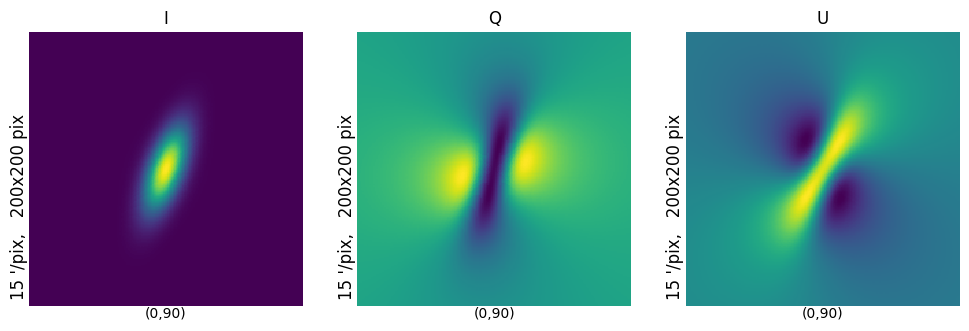

In [4]:
plot_function(
    fwhm_min_deg=5.0,
    fwhm_max_deg=13.0,
    psi_ell_deg=20.0,
    psi_pol_deg=0.0,
    cross_polar_leakage=1e-5,
    lmax=250,
    nside=512,
)